In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True, rc={'figure.figsize':(11,8)}, font_scale=1.5)

In [2]:
_DATA_DIR = './Data'

In [3]:
! python3 --version

Python 3.6.8


# Lending Club example 

In [4]:
# load data
loan = pd.read_csv('%s/loan.csv'%(_DATA_DIR), index_col = 0)

# 0: charged off, 1: fully paid, -1: other
loan = loan[loan['Paid']!= -1]
loan['log_inc'] = loan['annual_inc'].apply(lambda x: np.log(x))

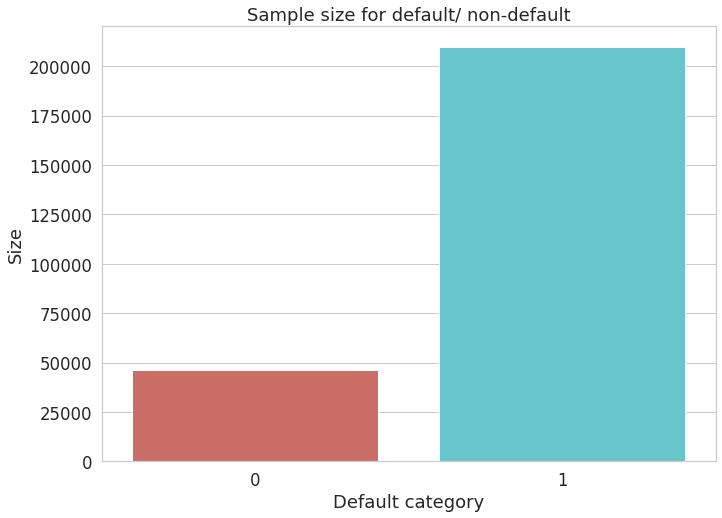

In [5]:
# Countplot
sns.countplot(x='Paid', data = loan, palette ='hls')
plt.xlabel('Default category')
plt.ylabel('Size')
plt.title('Sample size for default/ non-default')
#plt.savefig('%s/LendingClub/Counterplot_1.pdf'%(_FIGURE_DIR))
plt.show()

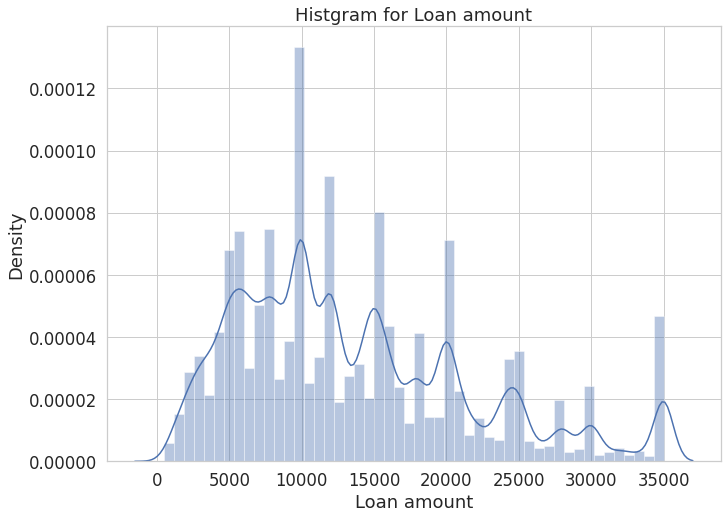

In [6]:
# Histgram 1
sns.distplot(loan.loan_amnt)
plt.xlabel('Loan amount')
plt.title('Histgram for Loan amount')
#plt.savefig('%s/LendingClub/Histgram_1.pdf'%(_FIGURE_DIR))
plt.show()

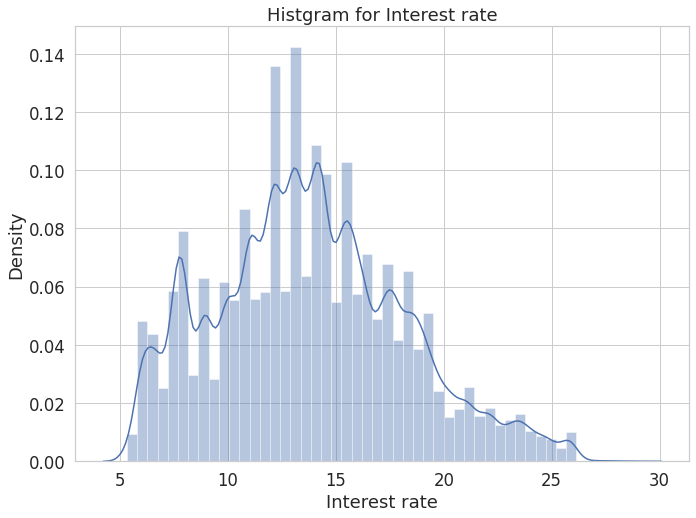

In [7]:
# Histgram 2
sns.distplot(loan.int_rate)
plt.xlabel('Interest rate')
plt.title('Histgram for Interest rate')
# plt.savefig('%s/LendingClub/Histgram_2.pdf'%(_FIGURE_DIR))
plt.show()

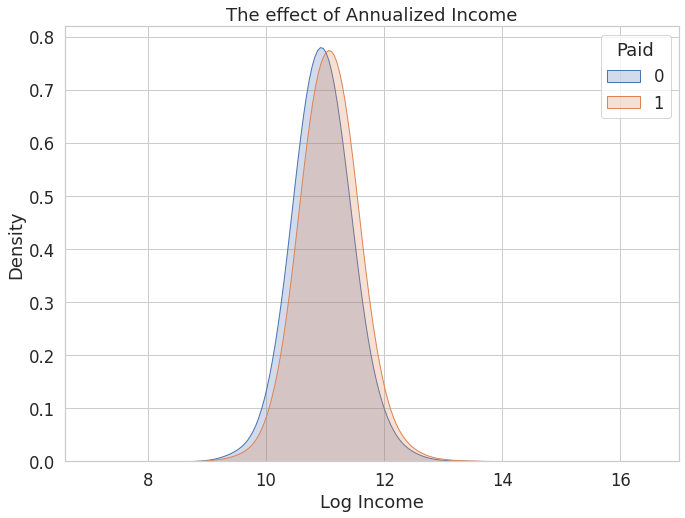

In [8]:
# Density plot 1
sns.kdeplot(loan['log_inc'].loc[loan['Paid'] == 0], hue=loan['Paid'], shade=True,bw_adjust=3)
sns.kdeplot(loan['log_inc'].loc[loan['Paid'] == 1], hue=loan['Paid'], shade=True,bw_adjust=3)
plt.title('The effect of Annualized Income')
plt.xlabel('Log Income')
plt.show()


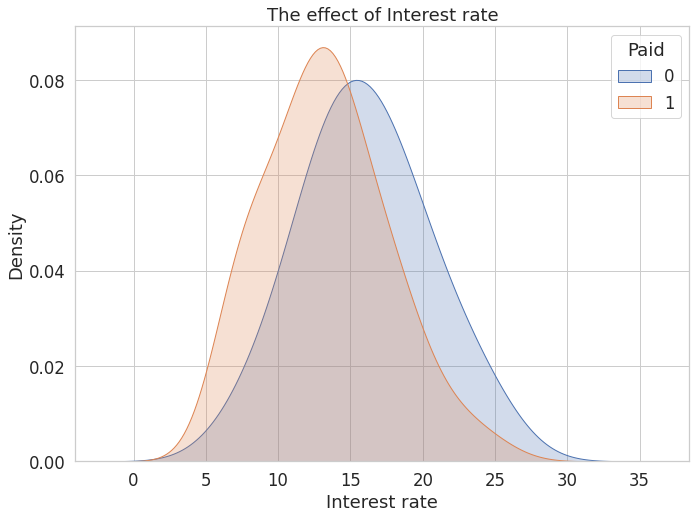

In [9]:
# Density plot 2
# We need to be super careful about this interest rate
sns.kdeplot(loan['int_rate'].loc[loan['Paid'] == 0], hue=loan['Paid'], shade=True,bw_adjust=5)
sns.kdeplot(loan['int_rate'].loc[loan['Paid'] == 1], hue=loan['Paid'], shade=True,bw_adjust=5)
plt.title('The effect of Interest rate')
plt.xlabel('Interest rate')
plt.show()

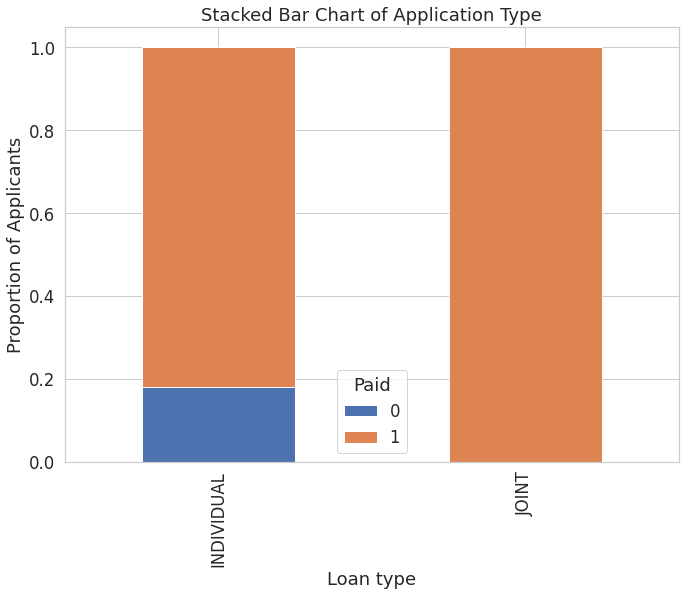

In [10]:
table = pd.crosstab(loan['application_type'], loan.Paid)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('Stacked Bar Chart of Application Type')
plt.xlabel('Loan type')
plt.ylabel('Proportion of Applicants')
plt.show()

Text(0, 0.5, 'Proportion of Applicants')

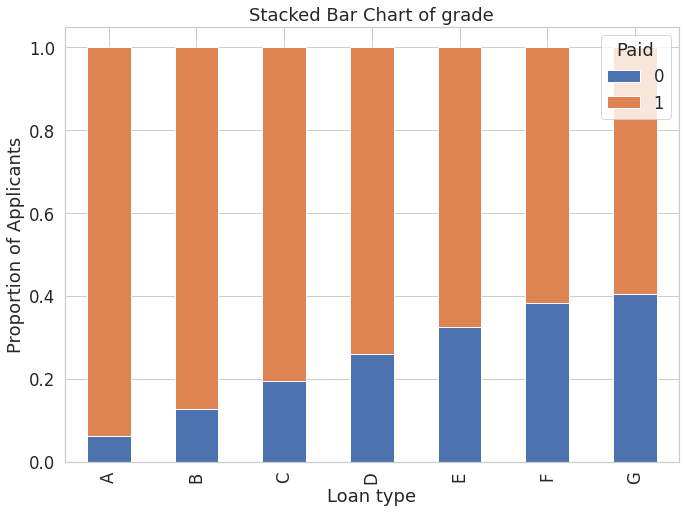

In [11]:
table = pd.crosstab(loan['grade'], loan.Paid)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('Stacked Bar Chart of grade')
plt.xlabel('Loan type')
plt.ylabel('Proportion of Applicants')

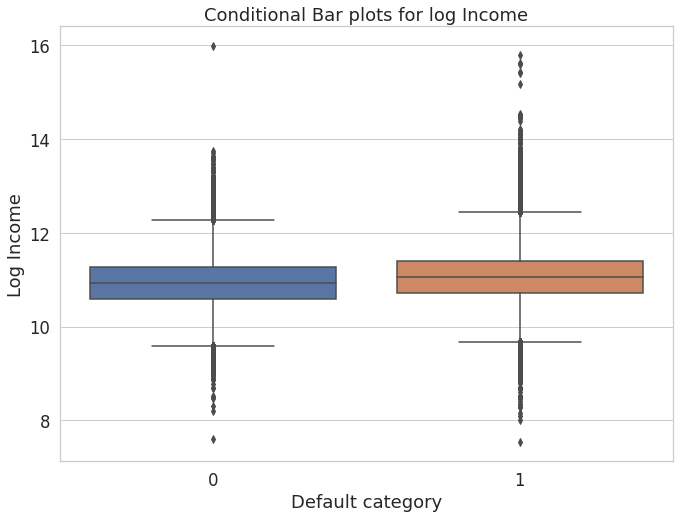

In [12]:
# conditional bar plot 1
sns.boxplot(x="Paid", y="log_inc", data=loan)
plt.title('Conditional Bar plots for log Income')
plt.xlabel('Default category')
plt.ylabel('Log Income')
plt.show()

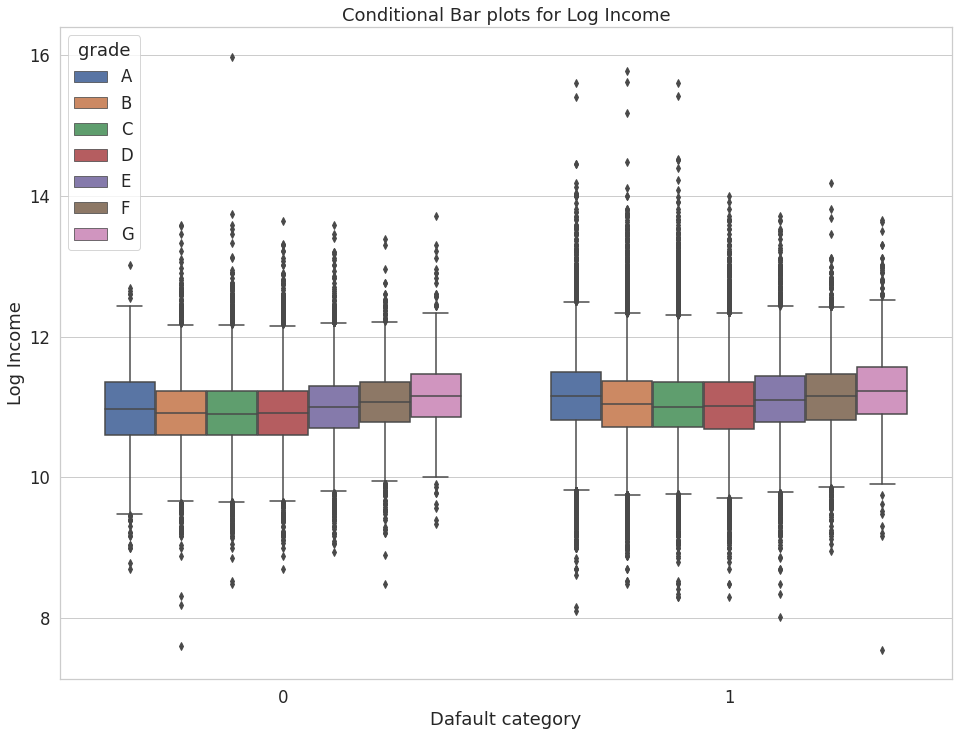

In [13]:
# conditional bar plot 2
loan = loan.sort_values(['grade'], ascending=True).reset_index(drop=True)
plt.figure(figsize = (16,12))
sns.boxplot(x="Paid", y="log_inc", hue="grade", data=loan)
plt.xlabel('Dafault category')
plt.ylabel('Log Income')
plt.title('Conditional Bar plots for Log Income')
plt.show()

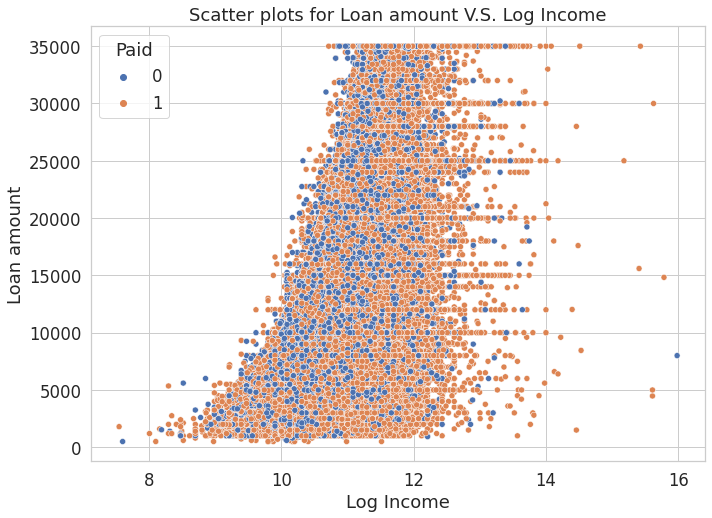

In [14]:
# Scatter plot 1
sns.scatterplot(x="log_inc", y="loan_amnt",  hue="Paid", data=loan)
plt.xlabel('Log Income')
plt.ylabel('Loan amount')
plt.title('Scatter plots for Loan amount V.S. Log Income')
plt.show()

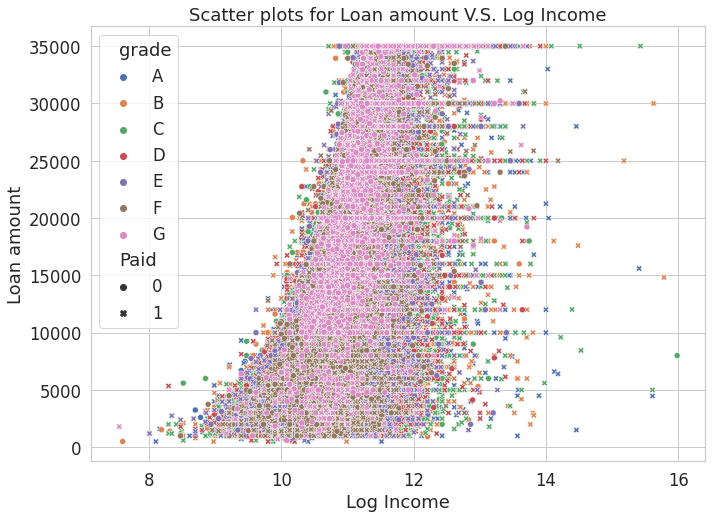

In [15]:
# add one more dimension by changing the style and hue
sns.scatterplot(x="log_inc", y="loan_amnt",  hue="grade", style="Paid", data=loan);
plt.xlabel('Log Income')
plt.ylabel('Loan amount')
plt.title('Scatter plots for Loan amount V.S. Log Income')
plt.show()

# CAPM example

In [16]:
# load data
stocks = pd.read_csv('%s/dj30.csv'%(_DATA_DIR))
riskfree = pd.read_csv('%s/DTB3.csv'%(_DATA_DIR))

riskfree['rf'] = riskfree.DTB3 /25200
riskfree['date'] = pd.to_datetime(riskfree['DATE']).dt.strftime('%Y%m%d').astype(int)
stocks = pd.merge(stocks, riskfree, on="date")

# select AAPL as an example
stock = stocks[stocks.TICKER == 'AAPL'][['date','RET','PRC']].set_index('date')
stock.index = stock.index.astype(str)

In [17]:
# Get the split date index
idx = stock.index.tolist()
stock_split = '20200824'
idx.index(stock_split)

1168

<AxesSubplot:title={'center':'Time series for Apple Stock Price'}, xlabel='date', ylabel='Stock price'>

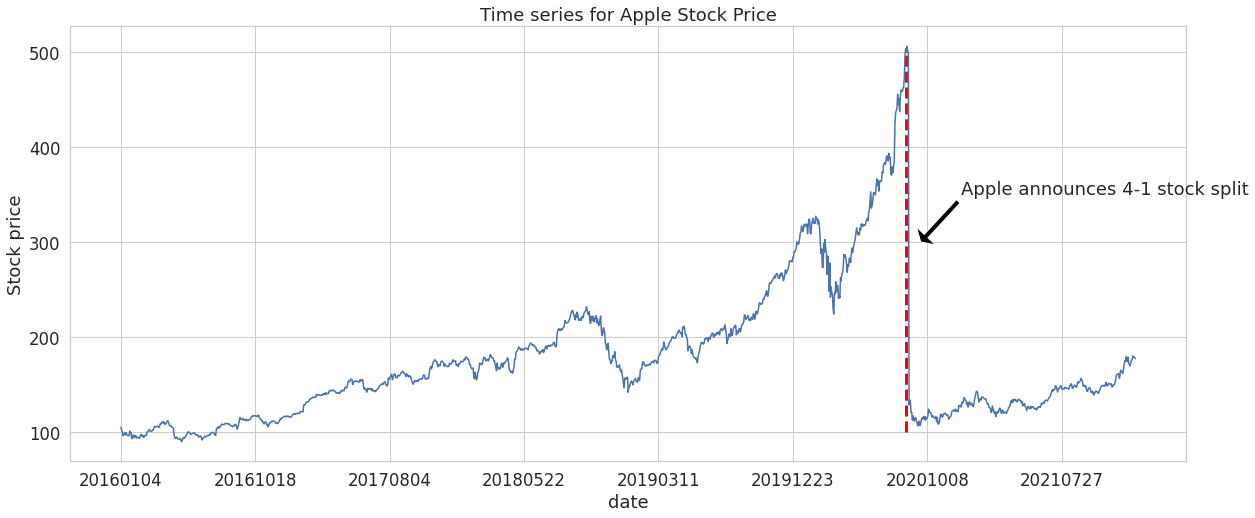

In [18]:
plt.figure(figsize = (20,8))
plt.vlines(1168, 100, 500,color="red", linestyles ="dashed",lw = 3)
plt.annotate('Apple announces 4-1 stock split', xy = (1190, 300),xytext = (1250, 350),arrowprops = dict(facecolor = 'black', shrink = 0.005, width = 5, headwidth = 26,headlength = 8))

plt.xlabel('Time period')
plt.ylabel('Stock price')
plt.title('Time series for Apple Stock Price')

stock.PRC.plot()

<AxesSubplot:title={'center':'Time series for Apple Stock Return'}, xlabel='date', ylabel='Stock Return'>

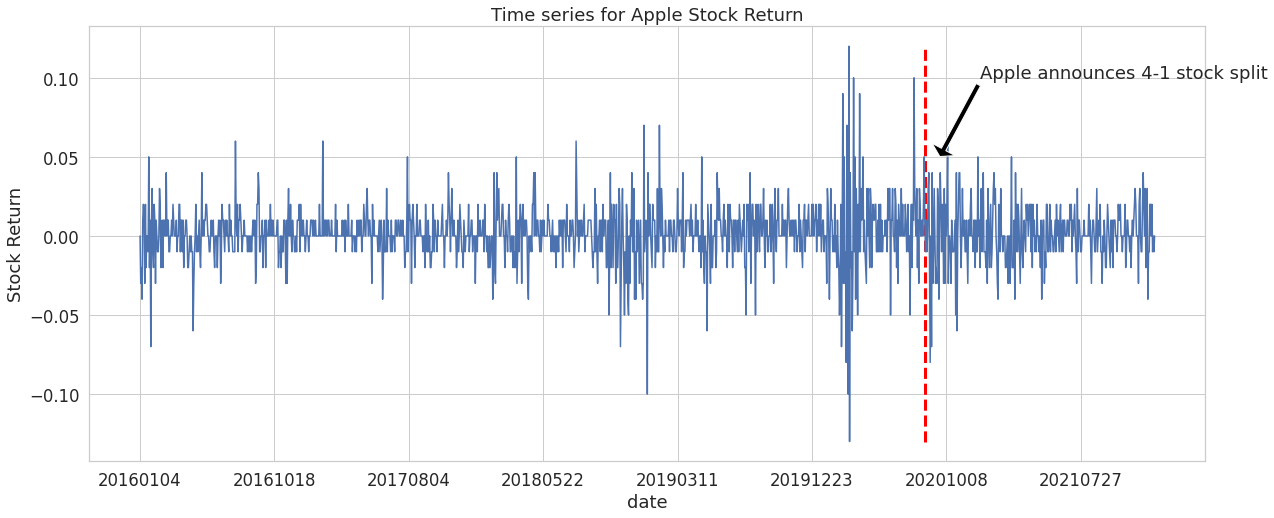

In [19]:
# time serie of return
plt.figure(figsize = (20,8))
plt.vlines(1168, stock.RET.min(), stock.RET.max(),color="red", linestyles ="dashed",lw = 3)
plt.annotate('Apple announces 4-1 stock split', xy = (1190, 0.05),xytext = (1250,0.1),arrowprops = dict(facecolor = 'black', shrink = 0.005, width = 5, headwidth = 26,headlength = 8))

plt.xlabel('Time period')
plt.ylabel('Stock Return')
plt.title('Time series for Apple Stock Return')

stock.RET.plot()



<AxesSubplot:title={'center':'Time series for Apple Stock Cumulative Return'}, xlabel='date', ylabel='Stock Cumulative Return'>

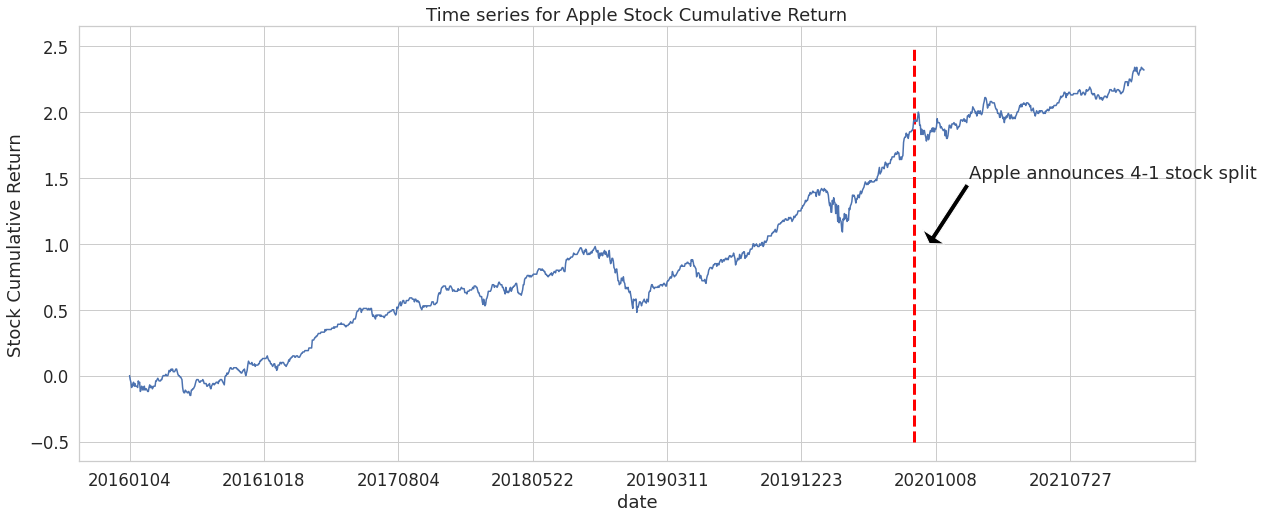

In [20]:
# time serie of return
plt.figure(figsize = (20,8))
plt.vlines(1168, -0.5, 2.5,color="red", linestyles ="dashed",lw = 3)
plt.annotate('Apple announces 4-1 stock split', xy = (1190, 1),xytext = (1250,1.5),arrowprops = dict(facecolor = 'black', shrink = 0.005, width = 5, headwidth = 26,headlength = 8))

plt.xlabel('Time period')
plt.ylabel('Stock Cumulative Return')
plt.title('Time series for Apple Stock Cumulative Return')

np.cumsum(stock.RET).plot()
# plt.savefig('%s/CAPM/Time_series_3.pdf'%(_FIGURE_DIR))




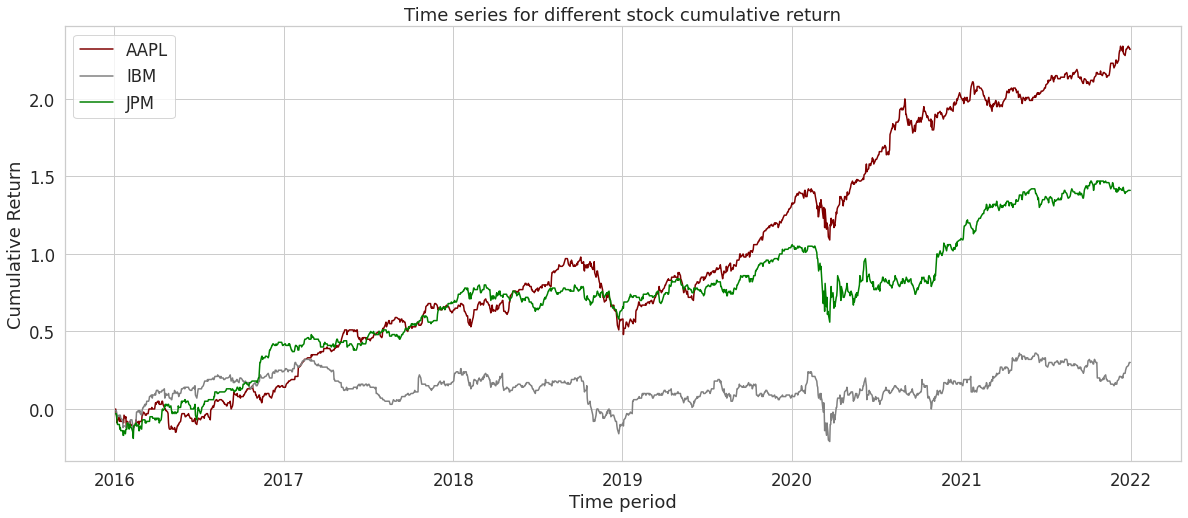

In [21]:
# Comparison

stocks['date'] = pd.to_datetime(stocks['date'], format='%Y%m%d')

AAPL = stocks[stocks.TICKER == 'AAPL'][['date','RET','PRC']]
AAPL['CR'] = np.cumsum(AAPL.RET)
IBM = stocks[stocks.TICKER == 'IBM'][['date','RET','PRC']]
IBM['CR'] = np.cumsum(IBM.RET)
JPM = stocks[stocks.TICKER == 'JPM'][['date','RET','PRC']]
JPM['CR'] = np.cumsum(JPM.RET)

fig, ax = plt.subplots(1, 1, figsize = (20, 8))
plt.plot(AAPL.date, AAPL.CR, color = 'maroon')
plt.plot(IBM.date, IBM.CR, color = 'gray')
plt.plot(JPM.date, JPM.CR, color = 'green')
plt.xlabel('Time period')
plt.ylabel('Cumulative Return')
plt.title('Time series for different stock cumulative return')
plt.legend(['AAPL','IBM','JPM']);


In [22]:
import statsmodels.formula.api as smf

unique_stock = stocks.TICKER.unique()
coeff = pd.DataFrame(unique_stock)
coeff.columns = ['TICKER']

for i in range(len(unique_stock)):
    
    mystock = unique_stock[i]
    
    df = stocks[stocks.TICKER == mystock].set_index('date')[['RET','MrkRet','rf']]
    
    reg = smf.glm(formula='(RET-rf) ~ (MrkRet-rf)', data=df).fit()
    
    alpha = reg.params[0]
    beta = reg.params[1]
    
    coeff.loc[i,'alpha'] = alpha.tolist()
    coeff.loc[i,'beta'] = beta.tolist()

In [23]:
pal = sns.color_palette("Reds_r",31)

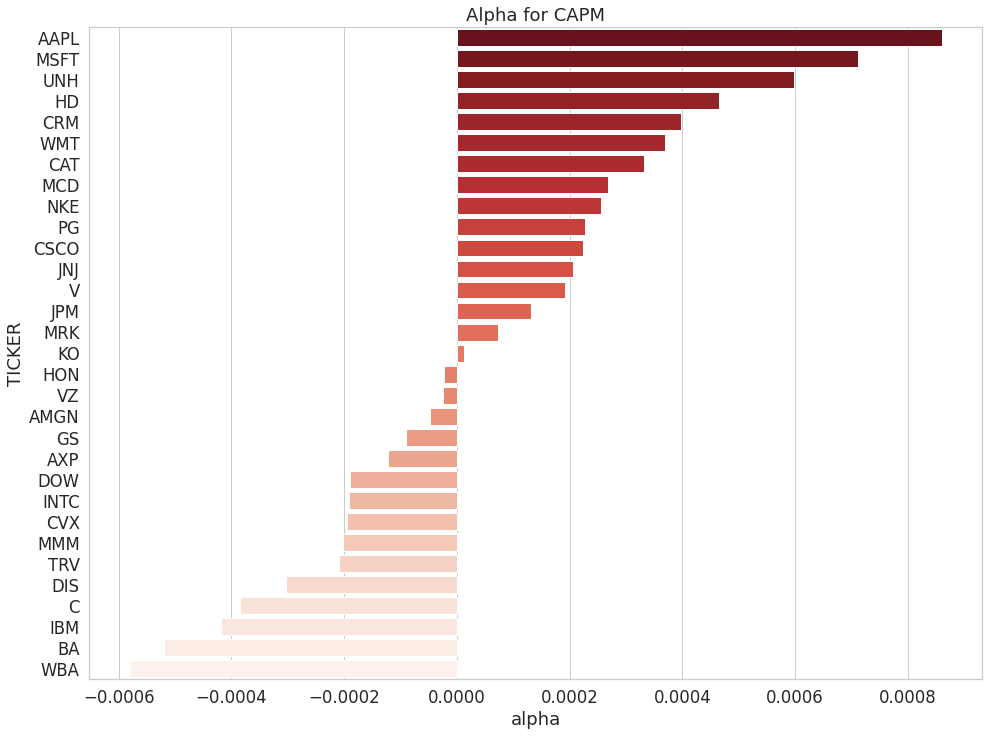

In [24]:
# bar chart
coeff = coeff.sort_values(['alpha'], ascending=False).reset_index(drop=True)
plt.figure(figsize = (16,12))
sns.barplot(
    x="alpha", 
    y="TICKER", 
    data=coeff, 
    estimator=sum,
    palette=pal
);
plt.title('Alpha for CAPM')

plt.show()


In [25]:
pal = sns.color_palette("Blues_r",31)

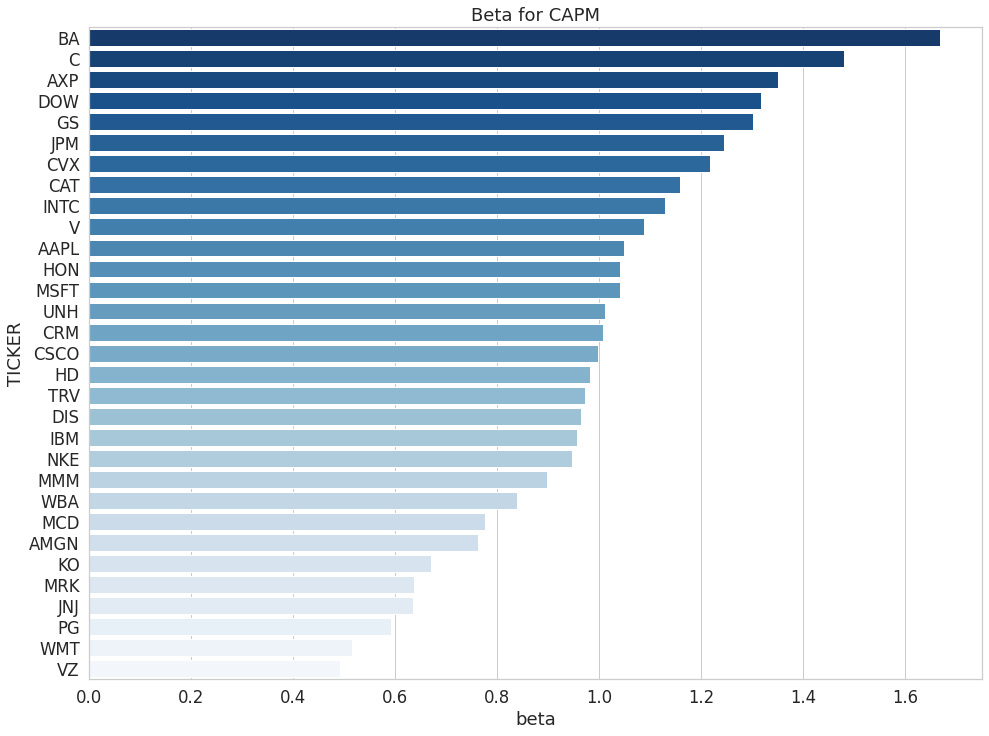

In [26]:
coeff = coeff.sort_values(['beta'], ascending=False).reset_index(drop=True)
plt.figure(figsize = (16,12))
sns.barplot(
    x="beta", 
    y="TICKER", 
    data=coeff, 
    estimator=sum,
    palette=pal
);
plt.title('Beta for CAPM')

plt.show()

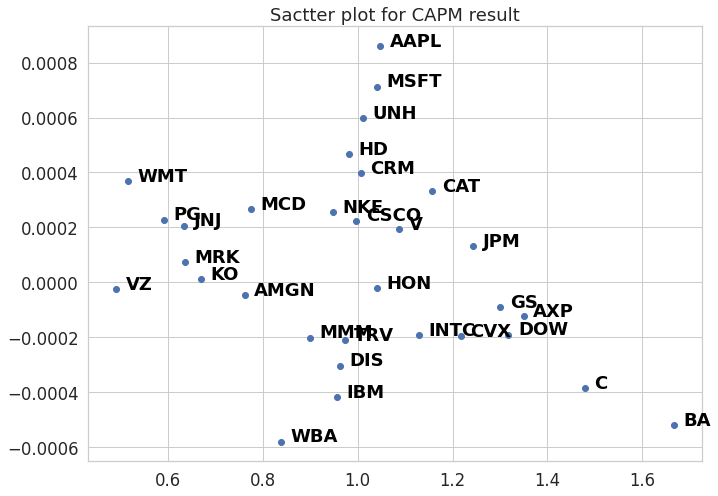

In [27]:
# Scatter plot with text
plt.plot(coeff.beta, coeff.alpha,'o')

for line in range(0,coeff.shape[0]):
     plt.text(coeff.beta[line]+0.02, coeff.alpha[line], coeff.TICKER[line], 
              horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('Sactter plot for CAPM result')

plt.show()

# Maps

In [28]:
import geopandas as gpd
zips = pd.read_csv('%s/zipcode.csv'%(_DATA_DIR))
store_opening =  pd.read_csv('%s/store_openings.csv'%(_DATA_DIR))
walmart = temp = pd.merge(store_opening, zips, left_on = ['STRCITY','STRSTATE'],right_on = ['city','state'], how = 'left')
walmart.drop_duplicates('storenum', inplace = True)

# Get the geometric information
geo_walmart = gpd.GeoDataFrame(walmart, geometry=gpd.points_from_xy(walmart.longitude, walmart.latitude))
geo_walmart['Date']  = geo_walmart['OPENDATE'].apply(lambda x: x[-5:-1])


(-127.61463619999999, -64.0610978, 23.253819649999997, 50.62866934999999)

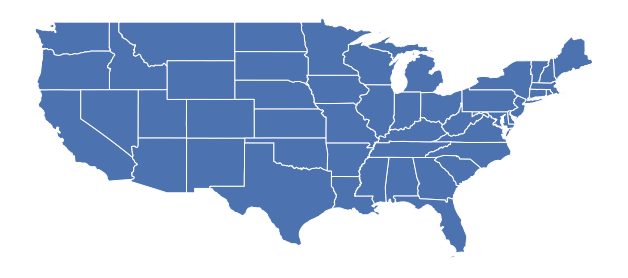

In [29]:
# Get the USA map
usa_map = gpd.read_file("%s/cb_2018_us_state_20m.shp"%(_DATA_DIR))
#usa = usa_map[~usa_map.NAME.isin(['Alaska','Hawaii','Puerto Rico'])]
usa = usa_map[~usa_map.index.isin([7,25,48])]
usa.plot()
plt.axis('off')

<Figure size 1152x864 with 0 Axes>

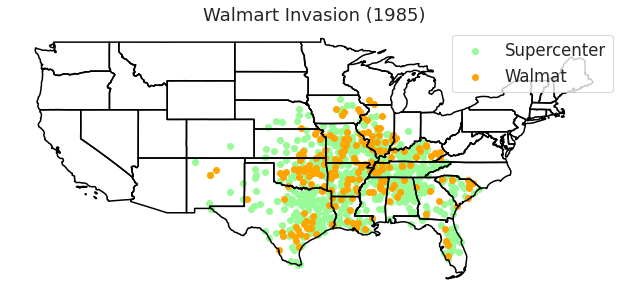

In [30]:
plt.figure(figsize = (16,12))
ax = usa.boundary.plot(edgecolor = 'black')

geo_walmart[(geo_walmart.type_store == 'Supercenter')&(geo_walmart.Date <'1986')].plot(ax=ax, color = 'palegreen',label = 'Supercenter',)
geo_walmart[(geo_walmart.type_store == 'Wal-Mart')&(geo_walmart.Date <'1986')].plot(ax=ax, color = 'orange',label = 'Walmat')
plt.legend()
plt.axis('off')
plt.title('Walmart Invasion (1985)')
plt.show()

<Figure size 1152x864 with 0 Axes>

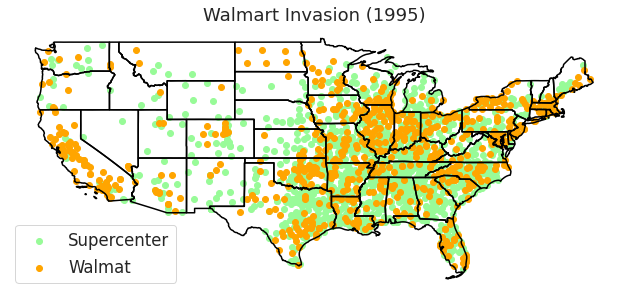

In [31]:
plt.figure(figsize = (16,12))
ax = usa.boundary.plot(edgecolor = 'black')

geo_walmart[(geo_walmart.type_store == 'Supercenter')&(geo_walmart.Date <'1996')].plot(ax=ax, color = 'palegreen',label = 'Supercenter',)
geo_walmart[(geo_walmart.type_store == 'Wal-Mart')&(geo_walmart.Date <'1996')].plot(ax=ax, color = 'orange',label = 'Walmat')
plt.legend()
plt.axis('off')
plt.title('Walmart Invasion (1995)')
plt.show()

<Figure size 1152x864 with 0 Axes>

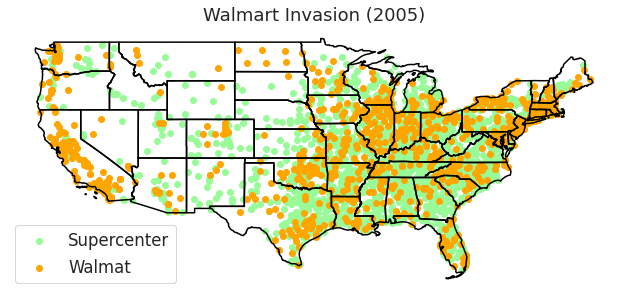

In [32]:
plt.figure(figsize = (16,12))
ax = usa.boundary.plot(edgecolor = 'black')

geo_walmart[(geo_walmart.type_store == 'Supercenter')&(geo_walmart.Date <'2006')].plot(ax=ax, color = 'palegreen',label = 'Supercenter',)
geo_walmart[(geo_walmart.type_store == 'Wal-Mart')&(geo_walmart.Date <'2006')].plot(ax=ax, color = 'orange',label = 'Walmat')
plt.legend()
plt.axis('off')
plt.title('Walmart Invasion (2005)')
plt.show()

# Trees 

In [33]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [34]:
df = loan[['log_inc', 'int_rate','Paid']].dropna()
X = df[['log_inc', 'int_rate']]
y = df.Paid

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234,max_leaf_nodes=10)
# clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [35]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 14.97
|   |--- feature_1 <= 11.53
|   |   |--- feature_1 <= 8.68
|   |   |   |--- class: 1
|   |   |--- feature_1 >  8.68
|   |   |   |--- feature_0 <= 10.75
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  10.75
|   |   |   |   |--- class: 1
|   |--- feature_1 >  11.53
|   |   |--- feature_0 <= 11.00
|   |   |   |--- class: 1
|   |   |--- feature_0 >  11.00
|   |   |   |--- class: 1
|--- feature_1 >  14.97
|   |--- feature_1 <= 18.89
|   |   |--- feature_0 <= 11.10
|   |   |   |--- class: 1
|   |   |--- feature_0 >  11.10
|   |   |   |--- class: 1
|   |--- feature_1 >  18.89
|   |   |--- feature_0 <= 11.30
|   |   |   |--- feature_1 <= 21.16
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  21.16
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  11.30
|   |   |   |--- class: 1



Text(0.5, 1.0, 'Tree model for predicting default')

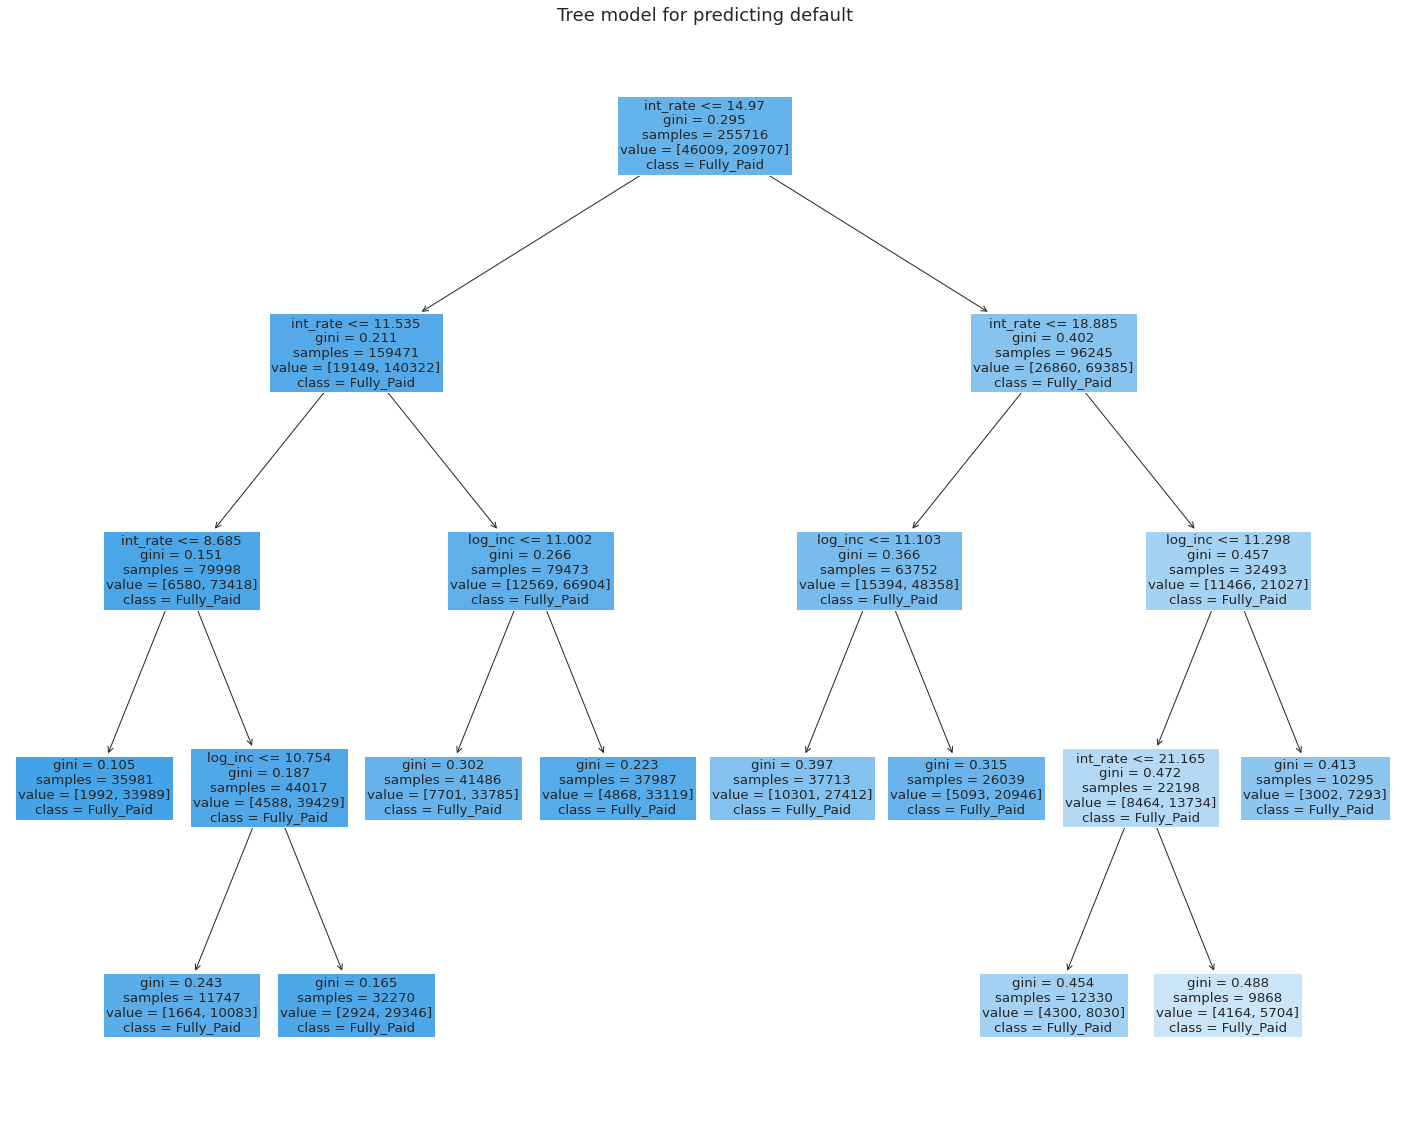

In [36]:
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(clf, 
                   feature_names=['log_inc', 'int_rate'],  
                   class_names=['Charged_off','Fully_Paid'],
                   filled=True)
plt.title('Tree model for predicting default')

# CNN

In [37]:
import random
from data_utils import load_CIFAR10

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

# Load the raw CIFAR-10 data.
cifar10_dir = '%s/cifar-10-data'%(_DATA_DIR)

X, Y, _, _ = load_CIFAR10(cifar10_dir)

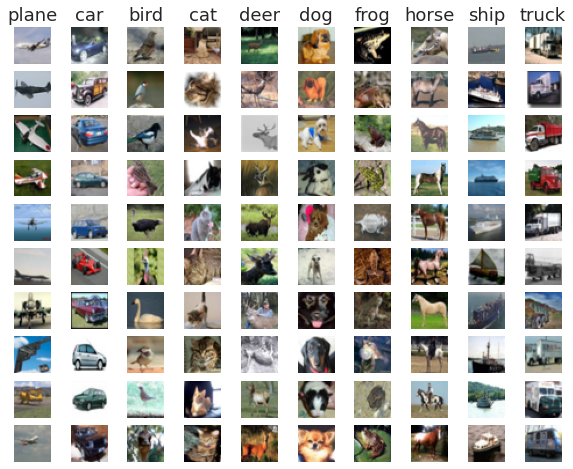

In [38]:
# Visualize some examples from the dataset.
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
#classes = ['plane', 'car','bird', 'cat']
num_classes = len(classes)
samples_per_class = 10
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(Y == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
# plt.savefig('%s/Graph/Graph_visualiza_1.pdf'%(_FIGURE_DIR))
plt.show()


# Text

In [39]:
from wordcloud import WordCloud

Trump_word_importance = pd.read_csv('%s/Trump_word_importance.csv'%(_DATA_DIR), index_col = 0)

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    max_font_size=100 , 
    scale=32)

(-0.5, 12799.5, 6399.5, -0.5)

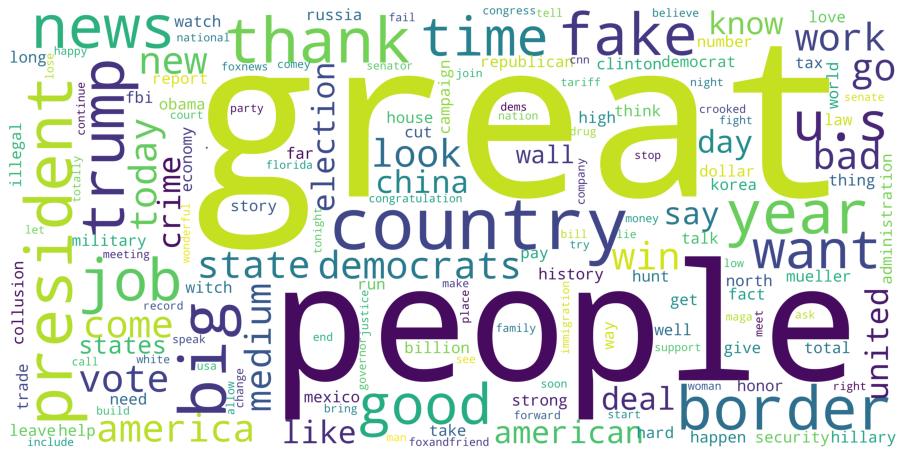

In [40]:
wc.generate_from_frequencies(dict(Trump_word_importance['Occurance']))

plt.figure(figsize = (16,12))
plt.imshow(wc)
plt.axis('off')

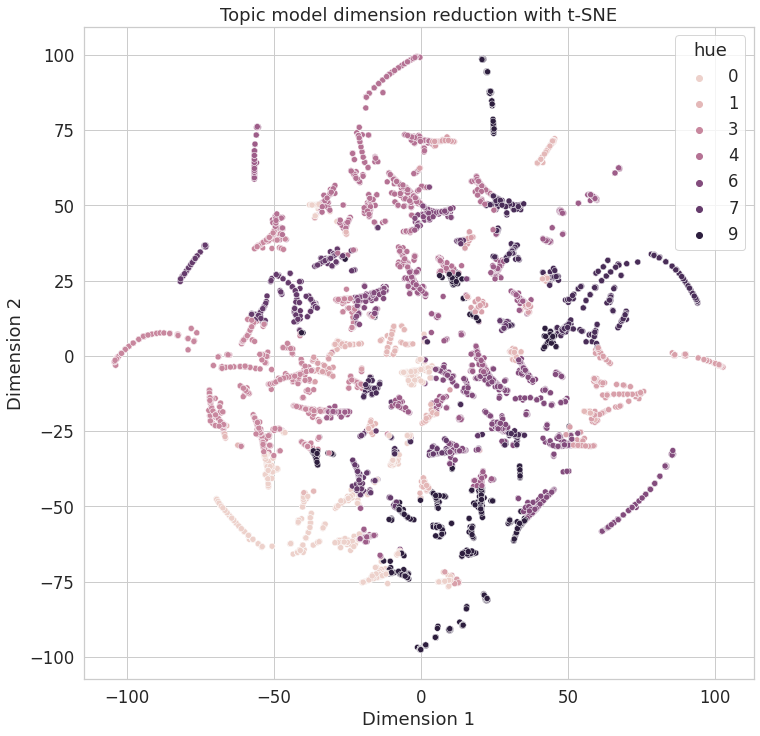

In [41]:
from sklearn.manifold import TSNE


# Load topic model dataset
hm = pd.read_csv('%s/Topic_model_result.csv'%(_DATA_DIR), index_col = 0)
hm = np.array(hm)


tsne = TSNE(random_state=2022, perplexity=30, early_exaggeration=120)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)
plt.figure(figsize = (12,12))
sns.scatterplot(x='x',y='y',hue='hue', data = embedding)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Topic model dimension reduction with t-SNE')

plt.show()
